In [1]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
FWD_17_20_df = pd.read_csv(Path('data/FWD_17_20_sum_df.csv'))
FWD_17_20_df.head()

,Player,MP,Starts,Min,Gls,Ast,PK,PKatt,CrdY,CrdR,xG,npxG,xA,PKmiss,FantPts
0,Aaron Connolly,17,9,834.0,2,0,0,0,0,0,2.4,2.4,0.2,0,37
1,Adam Idah,2,1,65.0,0,0,0,0,0,0,0.0,0.0,0.0,0,2
2,Adama Traoré,55,29,2864.0,5,8,0,0,1,0,3.3,3.3,7.1,0,143
3,Alexandre Lacazette,86,68,5994.0,33,15,2,2,8,0,29.0,27.5,8.2,0,475
4,Alireza Jahanbakhsh,25,15,1288.0,2,0,0,0,2,0,1.3,1.3,0.4,0,41


### Goals vs Expected 

Very simply, xG (or expected goals) is the probability that a shot will result in a goal based on the characteristics of that shot and the events leading up to it. Some of these characteristics/variables include:

Location of shooter: How far was it from the goal and at what angle on the pitch?
Body part: Was it a header or off the shooter's foot?
Type of pass: Was it from a through ball, cross, set piece, etc?
Type of attack: Was it from an established possession? Was it off a rebound? Did the defense have time to get in position? Did it follow a dribble?

Comparing xG to actual goals scored can indicate a player's shooting ability or luck. A player who consistently scores more goals than their total xG probably has an above average shooting/finishing ability.

In [3]:
X = FWD_17_20_df.xG.values.reshape(-1, 1)
y = FWD_17_20_df.Gls

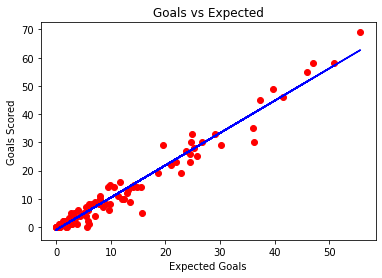

In [4]:
# Fitting Linear Regression to the dataset
lin_reg = LinearRegression()
lin_reg.fit(X, y)

# Visualizing the Linear Regression results
def viz_linear():
    plt.scatter(X, y, color='red')
    plt.plot(X, lin_reg.predict(X), color='blue')
    plt.title('Goals vs Expected')
    plt.xlabel('Expected Goals')
    plt.ylabel('Goals Scored')
    plt.show()
    return
viz_linear()

In [5]:
# Predicting a new result with Linear Regression
lin_reg.predict([[5.5]])

array([5.24508826])

In [6]:
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)
print(model.coef_)
print(model.intercept_)
print(y_pred.shape)

[1.14464507]
-1.0504596181928552
(109,)


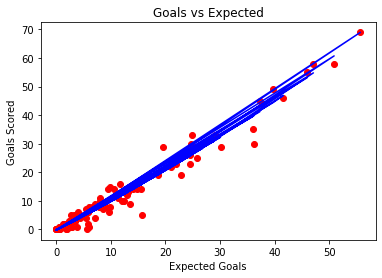

In [7]:
# Fitting Polynomial Regression to the dataset
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=4)
X_poly = poly_reg.fit_transform(X)
pol_reg = LinearRegression()
pol_reg.fit(X_poly, y)

# Visualizing the Polymonial Regression results
def viz_polymonial():
    plt.scatter(X, y, color='red')
    plt.plot(X, pol_reg.predict(poly_reg.fit_transform(X)), color='blue')
    plt.title('Goals vs Expected')
    plt.xlabel('Expected Goals')
    plt.ylabel('Goals Scored')
    plt.show()
    return
viz_polymonial()

In [8]:
# Predicting a new result with Polymonial Regression
pol_reg.predict(poly_reg.fit_transform([[5.5]]))

array([5.1321444])

In [9]:
# Fitting Logistic Regression to the dataset
from sklearn.model_selection import train_test_split 
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [10]:
from sklearn.linear_model import LogisticRegression 
classifier = LogisticRegression(solver='lbfgs',
                               max_iter=400, random_state = 1) 
classifier.fit(Xtrain, ytrain)
y_pred = classifier.predict(Xtest) 

/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [11]:
from sklearn.metrics import confusion_matrix 
cm = confusion_matrix(ytest, y_pred) 
  
print ("Confusion Matrix : \n", cm) 

Confusion Matrix : 
 [[4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [5 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

In [12]:
from sklearn.metrics import accuracy_score 
print ("Accuracy : ", accuracy_score(ytest, y_pred))

Accuracy :  0.25


### Assists vs Expected 

xA, or expected assists, is the xG which follows a pass that assists a shot. This indicates a player's ability to set up scoring chances without having to rely on the actual result of the shot or the shooter's luck/ability. Note: Because xA comes from passes, not all assists will be given an xA value.

In [13]:
X = FWD_17_20_df.xA.values.reshape(-1, 1)
y = FWD_17_20_df.Ast

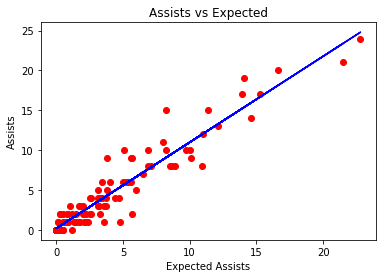

In [14]:
# Fitting Linear Regression to the dataset
lin_reg = LinearRegression()
lin_reg.fit(X, y)

# Visualizing the Linear Regression results
def viz_linear():
    plt.scatter(X, y, color='red')
    plt.plot(X, lin_reg.predict(X), color='blue')
    plt.title('Assists vs Expected')
    plt.xlabel('Expected Assists')
    plt.ylabel('Assists')
    plt.show()
    return
viz_linear()

In [15]:
# Predicting a new result with Linear Regression
lin_reg.predict([[5.5]])

array([6.11876212])

In [16]:
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)
print(model.coef_)
print(model.intercept_)
print(y_pred.shape)

[1.07937898]
0.18217774672225495
(109,)


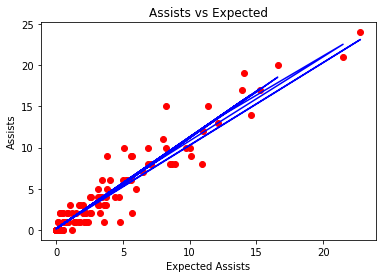

In [17]:
# Fitting Polynomial Regression to the dataset
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=4)
X_poly = poly_reg.fit_transform(X)
pol_reg = LinearRegression()
pol_reg.fit(X_poly, y)

# Visualizing the Polymonial Regression results
def viz_polymonial():
    plt.scatter(X, y, color='red')
    plt.plot(X, pol_reg.predict(poly_reg.fit_transform(X)), color='blue')
    plt.title('Assists vs Expected')
    plt.xlabel('Expected Assists')
    plt.ylabel('Assists')
    plt.show()
    return
viz_polymonial()

In [18]:
# Predicting a new result with Polymonial Regression
pol_reg.predict(poly_reg.fit_transform([[5.5]]))

array([6.10517219])

In [19]:
# Fitting Logistic Regression to the dataset
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [20]:
classifier = LogisticRegression(solver='lbfgs',
                               max_iter=400, random_state = 1) 
classifier.fit(Xtrain, ytrain)
y_pred = classifier.predict(Xtest)

In [21]:
print ("Accuracy : ", accuracy_score(ytest, y_pred))

Accuracy :  0.32142857142857145


###  Fantasy Points

In [22]:
X = FWD_17_20_df.Gls.values.reshape(-1, 1)
y = FWD_17_20_df.FantPts

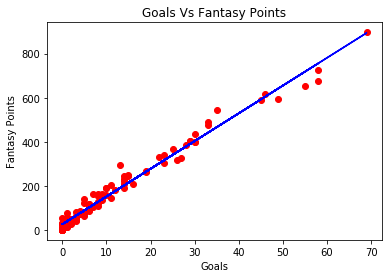

In [23]:
# Fitting Linear Regression to the dataset
lin_reg = LinearRegression()
lin_reg.fit(X, y)

# Visualizing the Linear Regression results
def viz_linear():
    plt.scatter(X, y, color='red')
    plt.plot(X, lin_reg.predict(X), color='blue')
    plt.title('Goals Vs Fantasy Points')
    plt.xlabel('Goals')
    plt.ylabel('Fantasy Points')
    plt.show()
    return
viz_linear()

In [24]:
# Predicting a new result with Linear Regression
lin_reg.predict([[5.5]])

array([95.73103401])

In [25]:
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)
print(model.coef_)
print(model.intercept_)
print(y_pred.shape)

[12.57147866]
26.587901406933867
(109,)


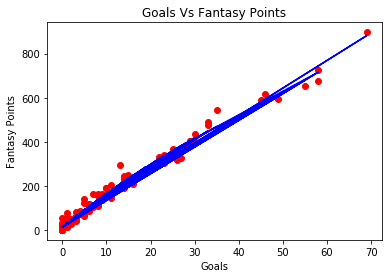

In [26]:
poly_reg = PolynomialFeatures(degree=4)
X_poly = poly_reg.fit_transform(X)
pol_reg = LinearRegression()
pol_reg.fit(X_poly, y)

# Visualizing the Polymonial Regression results
def viz_polymonial():
    plt.scatter(X, y, color='red')
    plt.plot(X, pol_reg.predict(poly_reg.fit_transform(X)), color='blue')
    plt.title('Goals Vs Fantasy Points')
    plt.xlabel('Goals')
    plt.ylabel('Fantasy Points')
    plt.show()
    return
viz_polymonial()

In [27]:
# Predicting a new result with Polymonial Regression
pol_reg.predict(poly_reg.fit_transform([[5.5]]))

array([98.8712619])